In [1]:
import h5py 
import numpy as np
import matplotlib.pyplot as plt
import os

import sys
sys.path.append("..")
from data.utils import distinct_colors

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [26]:
with h5py.File("/space/ariyanzarei/sorghum_segmentation/dataset/TreePartNetData/tree_labeled_test.hdf5") as f:
    points = np.array(f['points'])
    labels = np.array(f['primitive_id'])

with h5py.File("/space/ariyanzarei/sorghum_segmentation/results/TPN_model_test_set/TPN/predictions.hdf5") as f:
    preds = np.array(f['preds'])
    
print(points.shape)
print(labels.shape)
print(preds.shape)


(440, 8000, 3)
(440, 8000)
(440, 8000)


In [15]:
counter = 0

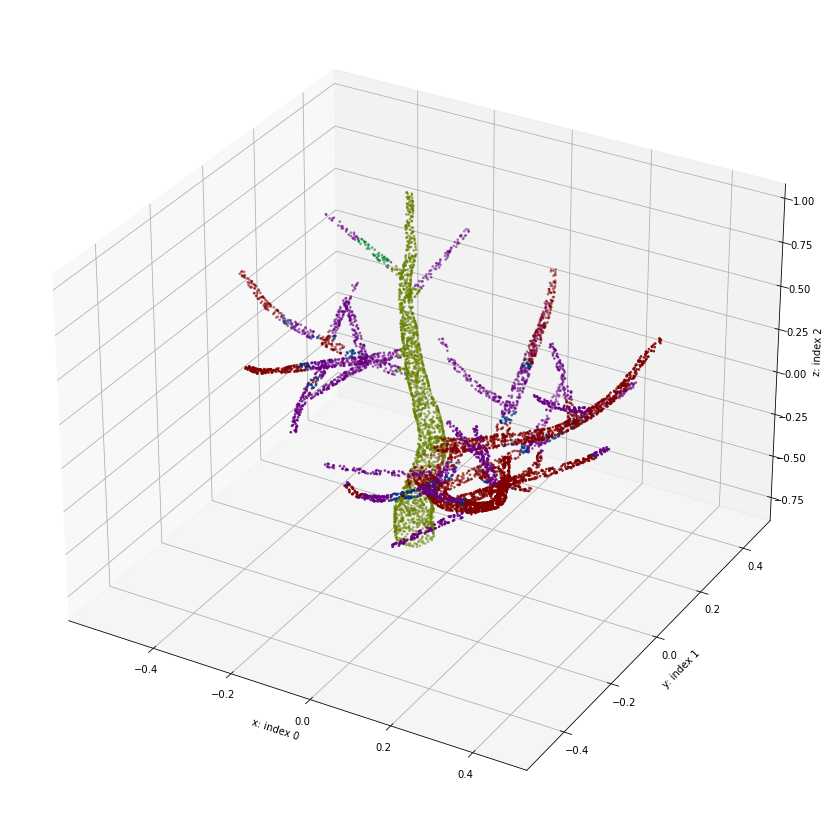

In [25]:
ind = counter
p = points[ind]
label = preds[ind]
counter+=1

rotation_matrix = np.eye(4)
rotation_matrix[1,1] = 0
rotation_matrix[1,2] = 1
rotation_matrix[2,1] = -1
rotation_matrix[2,2] = 0

new_p = np.matmul(np.hstack((p, np.ones((p.shape[0],1)))), rotation_matrix)
p = new_p

d_colors = distinct_colors(len(list(set(label))))
colors = np.zeros((label.shape[0],3))
for i, l in enumerate(list(set(label))):
    colors[label == l, :] = d_colors[i]
    
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(projection='3d')
ax.scatter(p[:,0],p[:,1],p[:,2], s=3, c=colors)
ax.set_xlabel("x: index 0")
ax.set_ylabel("y: index 1")
ax.set_zlabel("z: index 2")
plt.show()